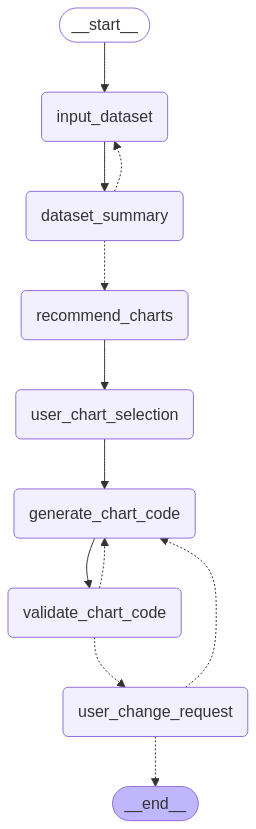

In [54]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.types import Command, interrupt
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display
import random
from typing import Literal, Optional

class State(TypedDict):
    input: str
    user_feedback: str

def input_dataset(state):
    print("---input dataset---")
    pass
def summarize(state):
    """
    Step 1:
    Summarize data and perform simple Exploratory Data Analysis, then either approve dataset or not.
    """
    print("---Step 1: Summarize---")
    pass

def recommend_charts(state):
    """
    Step 2:
    Generate business question and chart suggestion based on the summarize step.
    """
    print("---Step 2: recommend_charts---")
    pass

def user_chart_selection(state):
    """
    Step 3:
    Ask user to select a chart to visualize.
    """
    print("---Step 3: user feedback---")
    feedback = interrupt("Please provide feedback:")
    return {"user_feedback": feedback}
    pass

def generate_chart_code(state):
    """
    Step 4:
    Generate chart code then sends it for validation
    """
    print("---Step 4: code generation---")
    pass

def validate_chart_code(state):
    """
    Step 5:
    Validate the chart code then either passes or fails.
    if pass --> user change requests
    if fail --> go to step 4 and generate the code again given the error message
    """
    print("---Step 5: chart validate---")
    pass

def user_change_request(state):
    """
    Step 6:
    Ask user if there are any changes they want to implement
    if yes --> generate chart code based on the instructions
    if no --> present final chart
    """
    print("---Step 6: user change request---")
    pass

def decide_if_applicable(state) -> Literal["input_dataset", "recommend_charts"]:
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "input_dataset"
    
    # 50% of the time, we return Node 3
    return "recommend_charts"
    # decision = "input_dataset" if random.random() > 0.5 else "recommend_charts"
    # return decision


def decide_if_valid(state) -> Literal["user_change_request", "generate_chart_code"]:
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "user_change_request"
    
    # 50% of the time, we return Node 3
    return "generate_chart_code"
    # decision = "user_change_request" if random.random() > 0.5 else "generate_chart_code"
    # return decision

def decide_change_request(state) -> Optional[Literal['generate_chart_code']]:
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "generate_chart_code"
    
    # 50% of the time, we return Node 3
    return None



builder = StateGraph(State)
# Nodes
builder.add_node("input_dataset", input_dataset)
builder.add_node("dataset_summary", summarize)
builder.add_node("recommend_charts", recommend_charts)
builder.add_node("user_chart_selection", user_chart_selection)
builder.add_node("generate_chart_code", generate_chart_code)
builder.add_node("validate_chart_code", validate_chart_code)
builder.add_node("user_change_request", user_change_request)
# Edges
builder.add_edge(START, "input_dataset")
builder.add_edge("input_dataset", "dataset_summary")
builder.add_conditional_edges("dataset_summary", decide_if_applicable)
builder.add_edge("recommend_charts", "user_chart_selection")
builder.add_edge("user_chart_selection", "generate_chart_code")
builder.add_edge("generate_chart_code", "validate_chart_code")
builder.add_conditional_edges("validate_chart_code", decide_if_valid)
builder.add_conditional_edges("user_change_request", decide_change_request, {
    'generate_chart_code':'generate_chart_code',
    None: '__end__'
})

# Set up memory
memory = MemorySaver()

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))
# print(graph.get_graph().draw_ascii())

In [56]:
graph.invoke({'graph_state':'start'})

---input dataset---
---Step 1: Summarize---
---input dataset---
---Step 1: Summarize---
---Step 2: recommend_charts---
---Step 3: user feedback---
---Step 4: code generation---
---Step 5: chart validate---
---Step 4: code generation---
---Step 5: chart validate---
---Step 6: user change request---
